In [1]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train']/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train']])
x_test = mnist['x_test']/255.
y_test = np.array([np.eye(10)[n] for n in mnist['y_test']])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Reshape((28*28,), input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=40, batch_size=120)

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_train, y_train)))
print('Performance (testing)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_test, y_test)))

p_test = model.predict(x_test)
failedsample = [[img,y,p] for img,y,p in zip(mnist['x_test'],y_test,p_test) if y.argmax()!=p.argmax()]
print('# of failed test samples:',len(failedsample))

fig = plt.figure(figsize=(10,10), dpi=80)
for i in range(len(failedsample[:100])):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(failedsample[i][0], cmap='Greys')
    plt.text(0.,0.,'$%d\\to%d$' % (failedsample[i][1].argmax(),failedsample[i][2].argmax()),color='Red',fontsize=15)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/40
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2451 - acc: 0.9270
Epoch 2/40
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1021 - acc: 0.9682
Epoch 3/40
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0728 - acc: 0.9776
Epoch 4/40
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0566 - acc: 0.9812
Epoch 5/40
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0455 - acc: 0.9847
Epoch 6/40
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0386 - acc: 0.9870
Epoch 7/40
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0353 - acc: 0.9880
Epoch 8/40
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0313 - acc: 0.9894
Epoch 9/40
60000/60000 [==============================] - 3s 57us/

<Figure size 800x800 with 100 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train']/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train']])
x_test = mnist['x_test']/255.
y_test = np.array([np.eye(10)[n] for n in mnist['y_test']])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization
from tensorflow.keras.optimizers import Adam

m1 = Sequential()
m1.add(Reshape((784,), input_shape=(28,28)))
for layer in range(8):
    m1.add(Dense(256, activation='sigmoid'))
m1.add(Dense(10, activation='softmax'))
m1.compile(loss='categorical_crossentropy',
           optimizer=Adam(), metrics=['accuracy'])

m2 = Sequential()
m2.add(Reshape((784,), input_shape=(28,28)))
m2.add(BatchNormalization())
for layer in range(8):
    m2.add(Dense(256, activation='sigmoid'))
    m2.add(BatchNormalization())
m2.add(Dense(10, activation='softmax'))
m2.compile(loss='categorical_crossentropy',
           optimizer=Adam(), metrics=['accuracy'])

rec1 = m1.fit(x_train, y_train, epochs=40, batch_size=120,
              validation_data=(x_test, y_test))
rec2 = m2.fit(x_train, y_train, epochs=40, batch_size=120,
              validation_data=(x_test, y_test))

vep = np.linspace(1.,40.,40)
fig = plt.figure(figsize=(6,6), dpi=80)
plt.subplot(2,1,1)
plt.plot(vep,rec1.history['accuracy'], lw=3)
plt.plot(vep,rec1.history['val_accuracy'], lw=3)
plt.ylim(0.96,1.0)
plt.grid()
plt.subplot(2,1,2)
plt.plot(vep,rec2.history['accuracy'], lw=3)
plt.plot(vep,rec2.history['val_accuracy'], lw=3)
plt.ylim(0.96,1.0)
plt.grid()
plt.show()


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3679 - acc: 0.8993 - val_loss: 0.1395 - val_acc: 0.9603
Epoch 2/20
60000/60000 [==============================] - 9s 158us/sample - loss: 0.1315 - acc: 0.9625 - val_loss: 0.0875 - val_acc: 0.9753
Epoch 3/20
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0953 - acc: 0.9723 - val_loss: 0.0655 - val_acc: 0.9800
Epoch 4/20
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0772 - acc: 0.9770 - val_loss: 0.0578 - val_acc: 0.9815
Epoch 5/20
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0669 - acc: 0.9803 - val_loss: 0.0544 - val_acc: 0.9834
Epoch 6/20
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0608 - acc: 0.9821 - val_loss: 0.0486 - val_acc: 0.9829
Epoch 7/20
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0547 - acc: 0.9836 - val

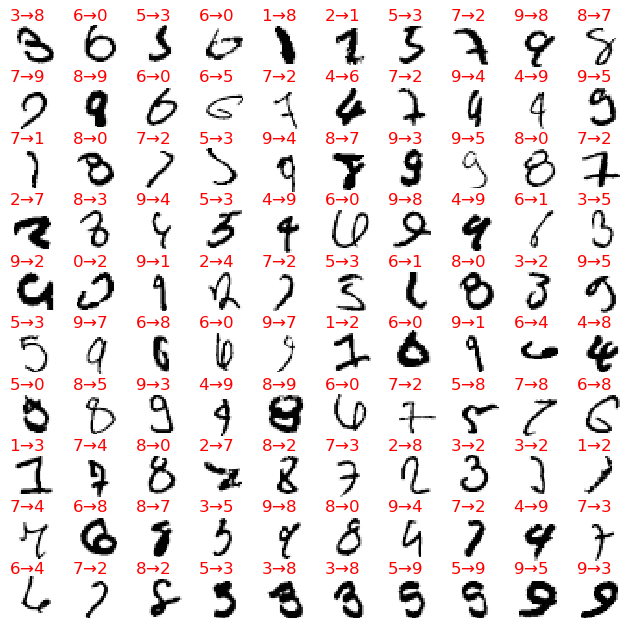

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train']/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train']])
x_test = mnist['x_test']/255.
y_test = np.array([np.eye(10)[n] for n in mnist['y_test']])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Reshape((28,28,1), input_shape=(28,28)))
model.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=120,
          validation_data=(x_test, y_test))

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_train, y_train)))
print('Performance (testing)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_test, y_test)))

p_test = model.predict(x_test)
failedsample = [[img,y,p] for img,y,p in zip(mnist['x_test'],y_test,p_test) if y.argmax()!=p.argmax()]
print('# of failed test samples:',len(failedsample))

fig = plt.figure(figsize=(10,10), dpi=80)
for i in range(len(failedsample[:100])):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(failedsample[i][0], cmap='Greys')
    plt.text(0.,0.,'$%d\\to%d$' % (failedsample[i][1].argmax(),failedsample[i][2].argmax()),color='Red',fontsize=15)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train']/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train']])
x_test = mnist['x_test']/255.
y_test = np.array([np.eye(10)[n] for n in mnist['y_test']])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Reshape((28,28,1), input_shape=(28,28)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=120,
          validation_data=(x_test, y_test))

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_train, y_train)))
print('Performance (testing)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_test, y_test)))

p_test = model.predict(x_test)
failedsample = [[img,y,p] for img,y,p in zip(mnist['x_test'],y_test,p_test) if y.argmax()!=p.argmax()]
print('# of failed test samples:',len(failedsample))

fig = plt.figure(figsize=(10,10), dpi=80)
for i in range(len(failedsample[:100])):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(failedsample[i][0], cmap='Greys')
    plt.text(0.,0.,'$%d\\to%d$' % (failedsample[i][1].argmax(),failedsample[i][2].argmax()),color='Red',fontsize=15)
plt.show()

In [105]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def loss_vs_bias(x_data, y_data):
    loss = np.zeros((4,31))
    ### START YOUR CODE HERE ###
    
    
    model = Sequential()
    model.add(Dense(units=1, activation='sigmoid',input_dim=1))
    model.add(Dense(units=1, activation='sigmoid'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.0))
    model.layers[0].set_weights([np.ones((1,1), dtype=np.int),np.zeros(1)])
    model.layers[1].set_weights([np.ones((1,1), dtype=np.int),np.zeros(1)])
    model.layers[2].set_weights([np.ones((1,1), dtype=np.int),np.zeros(1)])
    model.layers[3].set_weights([np.ones((1,1), dtype=np.int),np.zeros(1)])
    
    

    bias=np.linspace(-3,3,31)
    for i in range (4):
        for n,m in enumerate(bias):
            model.layers[3-i].set_weights([np.ones((1,1), dtype=np.int),np.array([m])])
            loss[i][n]=model.evaluate(x_data, y_data)
        model.layers[3-i].set_weights([np.ones((1,1), dtype=np.int),np.zeros(1)])

#     y_predict=model.predict(x_test)
    

    #### END YOUR CODE HERE ####
    return loss


In [106]:
loss_vs_bias(x_data, y_data)

100/100 [==============================] - 0s 60us/sample - loss: 0.7268


100/100 [==============================] - 0s 30us/sample - loss: 0.7285


array([[1.33625957, 1.24937636, 1.16624047, 1.08747567, 1.01376481,
        0.94583868, 0.88445758, 0.83038526, 0.7843563 , 0.74703817,
        0.71899127, 0.70063159, 0.69220032, 0.69374557, 0.70511874,
        0.7259858 , 0.75585227, 0.79409784, 0.84001567, 0.89285174,
        0.95184033, 1.01623369, 1.08532363, 1.15845672, 1.2350419 ,
        1.3145546 , 1.3965351 , 1.48058564, 1.5663653 , 1.65358452,
        1.74199831],
       [0.69158213, 0.69148556, 0.6914627 , 0.69155861, 0.69183208,
        0.69235623, 0.69321656, 0.69450638, 0.69631856, 0.69873397,
        0.70180785, 0.70555717, 0.70995128, 0.71490942, 0.72030651,
        0.7259858 , 0.7317761 , 0.73751055, 0.74304154, 0.74825122,
        0.75305613, 0.7574068 , 0.76128366, 0.76469107, 0.76765099,
        0.77019661, 0.77236774, 0.7742064 , 0.77575446, 0.77705144,
        0.77813361],
       [0.71099869, 0.71139253, 0.71185908, 0.71240816, 0.71304938,
        0.71379136, 0.71464064, 0.71560078, 0.71667085, 0.71784436,
      

In [34]:
type(Reshape((196,), input_shape=(14,14)))

tensorflow.python.keras.layers.core.Reshape

In [84]:
bias=np.linspace(-3,3,31)
for n,m in enumerate(bias):
    print(m)

-3.0
-2.8
-2.6
-2.4
-2.2
-2.0
-1.7999999999999998
-1.5999999999999999
-1.4
-1.2
-1.0
-0.7999999999999998
-0.5999999999999996
-0.3999999999999999
-0.19999999999999973
0.0
0.20000000000000018
0.40000000000000036
0.6000000000000001
0.8000000000000003
1.0
1.2000000000000002
1.4000000000000004
1.6000000000000005
1.8000000000000007
2.0
2.2
2.4000000000000004
2.6000000000000005
2.8000000000000007
3.0


In [74]:
bias

array([-3. , -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. ,
       -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,
        1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ])

In [110]:
x_train=np.array([[[np.random.randn()for m in range(14)]for n in range(14)]for i in range(100)])
y_train=np.array([np.random.randn() for n in range(100)])
for n,m in enumerate(y_train):
    if m<=-0:
        y_train[n]=0
    else:
        y_train[n]=1
W1=np.zeros((5,5,1,8), dtype=np.int)
W2=np.zeros((200,1), dtype=np.int)
x_test=np.array([[[np.random.randn()for m in range(14)]for n in range(14)]for i in range(100)])

In [129]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD

def build_network_model(x_train, y_train, x_test, W1, W2):
    y_predict = np.zeros((len(x_test),1))
    ### START YOUR CODE HERE ###

    model = Sequential()
    model.add(Reshape((14,14,1), input_shape=(14,14)))#0
    model.add(Conv2D(8, kernel_size=(5,5), activation='relu'))#1
    model.add(MaxPooling2D(pool_size=(2,2)))#2
    model.add(Flatten())#3
    model.add(Dense(1, activation='sigmoid'))#4

    model.layers[1].set_weights([W1,np.zeros(8)])
    model.layers[4].set_weights([W2,np.zeros(1)])

    
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=0.1),
                  metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=20, batch_size=100)
    y_predict = model.predict(x_test)


    #### END YOUR CODE HERE ####
    return y_predict


In [130]:
build_network_model(x_train, y_train, x_test, W1, W2)

Epoch 1/20
100/100 [==============================] - 0s 2ms/sample - loss: 0.6931 - acc: 0.4900
Epoch 2/20
100/100 [==============================] - 0s 70us/sample - loss: 0.6931 - acc: 0.5100
Epoch 3/20
100/100 [==============================] - 0s 70us/sample - loss: 0.6931 - acc: 0.5100
Epoch 4/20
100/100 [==============================] - 0s 40us/sample - loss: 0.6931 - acc: 0.5100
Epoch 5/20
100/100 [==============================] - 0s 60us/sample - loss: 0.6931 - acc: 0.5100
Epoch 6/20
100/100 [==============================] - 0s 50us/sample - loss: 0.6931 - acc: 0.5100
Epoch 7/20
100/100 [==============================] - 0s 60us/sample - loss: 0.6931 - acc: 0.5100
Epoch 8/20
100/100 [==============================] - 0s 40us/sample - loss: 0.6931 - acc: 0.5100
Epoch 9/20
100/100 [==============================] - 0s 40us/sample - loss: 0.6931 - acc: 0.5100
Epoch 10/20
100/100 [==============================] - 0s 60us/sample - loss: 0.6931 - acc: 0.5100
Epoch 11/20
100/100 

array([[0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.50397307],
       [0.503

In [ ]:
#HW1

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def loss_vs_bias(x_data, y_data):
    loss = np.zeros((4,31))
    ### START YOUR CODE HERE ###
    
    
    model = Sequential()
    model.add(Dense(units=1, activation='sigmoid',input_dim=1))
    model.add(Dense(units=1, activation='sigmoid'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.0))
    model.layers[0].set_weights([np.ones((1,1), dtype=np.int),np.zeros(1)])
    model.layers[1].set_weights([np.ones((1,1), dtype=np.int),np.zeros(1)])
    model.layers[2].set_weights([np.ones((1,1), dtype=np.int),np.zeros(1)])
    model.layers[3].set_weights([np.ones((1,1), dtype=np.int),np.zeros(1)])
    
    

    bias=np.linspace(-3,3,31)
    for i in range (4):
        for n,m in enumerate(bias):
            model.layers[3-i].set_weights([np.ones((1,1), dtype=np.int),np.array([m])])
            loss[i][n]=model.evaluate(x_data, y_data)
        model.layers[3-i].set_weights([np.ones((1,1), dtype=np.int),np.zeros(1)])

    #### END YOUR CODE HERE ####
    return loss


In [ ]:
#HW2

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD

def build_network_model(x_train, y_train, x_test, W1, W2):
    y_predict = np.zeros((len(x_test),1))
    ### START YOUR CODE HERE ###

    model = Sequential()
    model.add(Reshape((14,14,1), input_shape=(14,14)))#0
    model.add(Conv2D(8, kernel_size=(5,5), activation='relu'))#1
    model.add(MaxPooling2D(pool_size=(2,2)))#2
    model.add(Flatten())#3
    model.add(Dense(1, activation='sigmoid'))#4

    model.layers[1].set_weights([W1,np.zeros(8)])
    model.layers[4].set_weights([W2,np.zeros(1)])

    
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=0.1),
                  metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=20, batch_size=100)
    y_predict = model.predict(x_test)

    #### END YOUR CODE HERE ####
    return y_predict
